# # Ebrima's Covid-19 Data Analysis Project 

This project aims to highlight some key questions in the global coronavirus pandamic and answer those questions with the available data at my disposal. I would like to show the average infection rate in Senegal and also to answer the question of whether we are likely to record more deaths in Senegal as the number of cases rise. I will be looking at the relationship between the key fields (Confirmed, Deaths, Active) to see the relationship between them. Finally I will show if China has flattened its curve and look at some of the measures they put in place to have that success.


## Importing the neccessary python libraries.

Since this is a beginner level analysis without the need for more advanced predictions and modelling, I will be importing below some of the few but foundamental python libraries to have an effective and efficient analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# I will also import wget to be able to download the data 
import wget

## Downloading the raw data

I will download the data from the github account of Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)at https://github.com/CSSEGISandData/COVID-19. 

In [2]:
# urls for the datasets
urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
       ]
[wget.download(url) for url in urls]


['time_series_covid19_confirmed_global.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_recovered_global.csv']

In [3]:
# the dataframe containing information on the number of confirmed cases
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
# the dataframe containing information on the number of deaths
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
# the dataframe containing information on the number of recovered cases
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

Lets take a quick look at how the dataframes look like. Note, all three has the same structure.

In [4]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,135,150,166,179,188,188,207,220,228,252
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,327,345,356,385,394,403,410,422,431,455
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1099,1152,1204,1355,1408,1479,1508,1558,1651,1702
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,248,282,309,333,344,344,344,385,398,423
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,7


### Tidying up the Data.

Looking at the columns of the dataframe above, it tells me the dataframes it is not suitable for analysis yet. I will take a closer look at the data and clean them up. But first, let me show the columns.

In [5]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20',
       '4/26/20', '4/27/20', '4/28/20', '4/29/20'],
      dtype='object', length=103)

It appears that the dates are displayed as columns; from the fifth to the end as shown below.

In [6]:
deaths_df.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

It will be quite challenging to work with data like this, so I will melt the dataframe to unpivot it to look more readable.

In [7]:
# store all the dates in the variable dates
dates = confirmed_df.columns[4:]

# unpivot the confirmed dataframe to have a new Dates column.
confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)

# unpivot the deaths dataframe to have a new Dates column.
deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)

# unpivot the recovered dataframe to have a new Dates column.
recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)



I have now melted the dataframes. Lets have a look at how they look like by taking the deaths dataframe as an example.

In [8]:
deaths_df_long.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


Canada's recovered data has some inconsistences. So i will remove the recovered data for Canada.

In [9]:
recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']

Now that the dataframes looks more presentable, I will now merge the 3 dataframes into one call full_df.

In [10]:
# Merging confirmed_df_long and deaths_df_long
full_df = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

# Merging full_table and recovered_df_long
full_df = full_df.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

Lets peep through the full_df dataframe and see how it is looking by showing the first five rows.

In [11]:
full_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0.0


Lets check the data type of the Date column because i would like to be working with a timeseries dataframe.


In [12]:
full_df.Date.dtype

dtype('O')

Since it's a string object type, I will have to change it to datetime format.

In [13]:
full_df['Date'] = pd.to_datetime(full_df['Date'])

Lets check the data type of the Date column again:

In [14]:
full_df.Date.dtype

dtype('<M8[ns]')

Perfect! It's has been successfully converted to datetime.

Continuing with the data cleaning, I will now check the missing values in all the columns of the dataframe full_df.

In [15]:
full_df.isna().sum()

Province/State    18018
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered          2772
dtype: int64

There are a lot of missing values for the Province/State column but that is because many countries only report in terms of country cases not state wise. Example is my country, The Gambia. There is also a lot of missing values for the Recovered column and I will replace those with a 0.

In [16]:
full_df['Recovered'] = full_df.Recovered.fillna(0)

I am aware that reported cases from cruise ships have also been included in the data and values wrongly attributed to some columns. I will extract the rows with cruise ships information that I have knowledge of. 

In [17]:
ship_rows = full_df['Province/State'].str.contains('Grand Princess') | full_df['Province/State'].str.contains('Diamond Princess') | full_df['Country/Region'].str.contains('Diamond Princess') | full_df['Country/Region'].str.contains('MS Zaandam')
            
full_ship = full_df[ship_rows]
full_ship

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
37,Grand Princess,Canada,37.6489,-122.6655,2020-01-22,0,0,0.0
88,NaN,Diamond Princess,0.0000,0.0000,2020-01-22,0,0,0.0
231,Diamond Princess,Canada,0.0000,0.0000,2020-01-22,0,0,0.0
252,NaN,MS Zaandam,0.0000,0.0000,2020-01-22,0,0,0.0
301,Grand Princess,Canada,37.6489,-122.6655,2020-01-23,0,0,0.0
...,...,...,...,...,...,...,...,...
25860,NaN,MS Zaandam,0.0000,0.0000,2020-04-28,9,2,0.0
25909,Grand Princess,Canada,37.6489,-122.6655,2020-04-29,13,0,0.0
25960,NaN,Diamond Princess,0.0000,0.0000,2020-04-29,712,13,645.0
26103,Diamond Princess,Canada,0.0000,0.0000,2020-04-29,0,1,0.0


There are over 390 entries in the dataset containing records from cruise ships. I will get rid of them to have a more cleaned dataset

In [18]:
full_df = full_df[~(ship_rows)]

So far, I have the confirmed, death and recovered cases but the data is not telling me the current active cases. This can be calculated by subtracting the death and recovered cases from the confirmed cases. This I will do next and create a new column for it in the dataframe.

In [19]:
# Active Case = confirmed - deaths - recovered
active = full_df['Confirmed'] - full_df['Deaths'] - full_df['Recovered']

In [20]:
# Active Case = confirmed - deaths - recovered
full_df['Active'] = active

Wola! The new active cases column has been added to full_df. Lets look at the last 10 rows of the dataframe to confirm.

In [21]:
full_df.tail(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
26126,NaN,Burundi,-3.373100,29.918900,2020-04-29,11,1,4.0,6.0
26127,NaN,Sierra Leone,8.460555,-11.779889,2020-04-29,104,4,12.0,88.0
26128,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,2020-04-29,5,0,0.0,5.0
26129,NaN,Malawi,-13.254308,34.301525,2020-04-29,36,3,7.0,26.0
26130,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,2020-04-29,13,0,11.0,2.0
26131,Saint Pierre and Miquelon,France,46.885200,-56.315900,2020-04-29,1,0,0.0,1.0
26132,NaN,South Sudan,6.877000,31.307000,2020-04-29,34,0,0.0,34.0
26133,NaN,Western Sahara,24.215500,-12.885800,2020-04-29,6,0,5.0,1.0
26134,NaN,Sao Tome and Principe,0.186360,6.613081,2020-04-29,8,0,4.0,4.0
26135,NaN,Yemen,15.552727,48.516388,2020-04-29,6,0,0.0,6.0


I will now use groupby to group columns that are of interest to me for further analysis and show the last 10 entries of the dataframe.

In [22]:
full_grouped = full_df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [23]:
full_grouped.tail(10)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
18107,2020-04-29,United Kingdom,166441,26166,857.0,139418.0
18108,2020-04-29,Uruguay,630,15,412.0,203.0
18109,2020-04-29,Uzbekistan,2002,9,1096.0,897.0
18110,2020-04-29,Venezuela,331,10,142.0,179.0
18111,2020-04-29,Vietnam,270,0,222.0,48.0
18112,2020-04-29,West Bank and Gaza,344,2,71.0,271.0
18113,2020-04-29,Western Sahara,6,0,5.0,1.0
18114,2020-04-29,Yemen,6,0,0.0,6.0
18115,2020-04-29,Zambia,97,3,54.0,40.0
18116,2020-04-29,Zimbabwe,32,4,5.0,23.0


## Analysing the Data now.

I will now assigned the cleaned data to a new dataframe called df to continue with the naming convention.

In [24]:
df = full_grouped

In [25]:
df.set_index('Date', inplace=True)

I will graphically show the most important columns I will use in this analysis in the global pandamic!

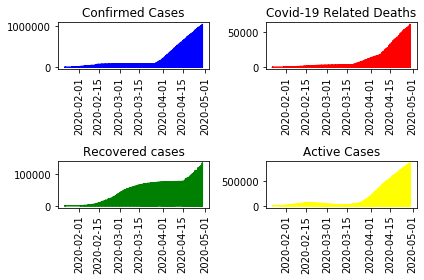

In [27]:
# Create a figure with 2x2 subplot layout and make the top left subplot active
plt.subplot(2,2,1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(df.Confirmed, color='blue')
plt.title('Confirmed Cases')
plt.xticks(rotation='vertical')

# Make the top right subplot active in the current 2x2 subplot grid 
plt.subplot(2,2,2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(df.Deaths, color='red')
plt.title('Covid-19 Related Deaths')
plt.xticks(rotation='vertical')

# Make the bottom left subplot active in the current 2x2 subplot grid
plt.subplot(2,2,3)

# Plot in green the % of degrees awarded to women in Health Professions
plt.plot(df.Recovered, color='green')
plt.title('Recovered cases')
plt.xticks(rotation='vertical')

# Make the bottom right subplot active in the current 2x2 subplot grid
plt.subplot(2,2,4)

# Plot in yellow the % of degrees awarded to women in Education
plt.plot(df.Active, color='yellow')
plt.title('Active Cases')
plt.xticks(rotation='vertical')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()

### What is the average infection rate in Senegal?

I will use the pandas mean method to answer that question.

In [28]:
senegal = df['Country/Region'] == 'Senegal'
df[senegal]['Confirmed'].mean()

126.62626262626263

This shows that the average infection rate in senegal is about 119. 

### Are we going to see more deaths as the number of confirmed cases grow in Senegal?

The plot below will help us answer that question.

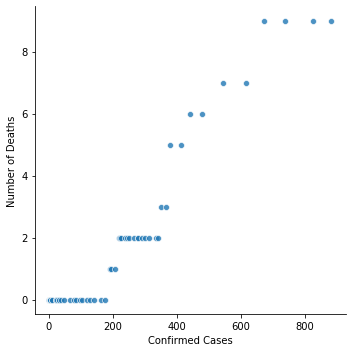

In [29]:
# confirmed = df[senegal]['Confirmed']
# deaths = df[senegal]['Deaths']

sns.relplot(x='Confirmed', y='Deaths', data=df[senegal], kind='scatter', alpha=0.8)

# Make a scatter plot
# plt.plot(confirmed, deaths, 'o', markersize=4, alpha=0.6)

plt.xlabel('Confirmed Cases')
plt.ylabel('Number of Deaths')

plt.show()

From the plot above, we can see the correlation between the confirmed cases and the number of deaths in Senegal. The higher the cases the more deaths there are. Unless there is a vaccine or they maintain strict restrictions with regards to social distancing, unnecessary travels etc.

### What is the relationship between the globally confirmed, deaths and active cases?

To determine this relationship, I will use the Pearson correlation to tell me if the variables are strongly related or not. It shows a number between -1 and 1 that indicates the extent to which two variables are linearly related. Closer to positive one means strong relationship and vise-versa. 

In [30]:
# The columns to check
fields = ['Confirmed', 'Deaths', 'Active']

In [31]:
# create a subset dataframe from the main dataframe (df)
subset = df[fields]

In [32]:
# calculate the correlation of the subset dataframe
subset.corr()

,Confirmed,Deaths,Active
Confirmed,1.000000,0.911854,0.975649
Deaths,0.911854,1.000000,0.862776
Active,0.975649,0.862776,1.000000


This matrix shows that there is a very strong relationship between these three varaibles

### Has China flatened its COVID-19 cases curve?

The virus first originated from the Wuhan region of China. But we have seen some very drastic measures put in place in Wuhan and else where in China to contain the spread. Did those measures ultimately paid off? I will look at the data from china, analyze it and plot a graph to show if China is seeing meaningful improvements up to now.

In [33]:
ch = df['Country/Region'] == 'China'
china = df[ch]
# take a look at the last five entries for China.
china.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active
Date,,,,,
2020-04-25,China,83909,4636,75671.0,3602.0
2020-04-26,China,83912,4637,75718.0,3557.0
2020-04-27,China,83918,4637,75772.0,3509.0
2020-04-28,China,83940,4637,75816.0,3487.0
2020-04-29,China,83944,4637,75855.0,3452.0


Let's see the statistical summary of the China datafram.

In [34]:
china.describe()

,Confirmed,Deaths,Recovered,Active
count,99.000000,99.000000,99.000000,99.000000
mean,66696.787879,2620.676768,45267.959596,18808.151515
std,27145.305720,1379.625051,31016.340778,18578.968327
min,548.000000,17.000000,28.000000,503.000000
25%,69463.000000,1714.500000,9363.500000,4175.000000
50%,80921.000000,3161.000000,59469.000000,8942.000000
75%,82572.500000,3331.500000,74815.000000,31728.500000
max,83944.000000,4637.000000,76011.000000,58910.000000


Now plot the confirmed cases for China using the seaborn library.

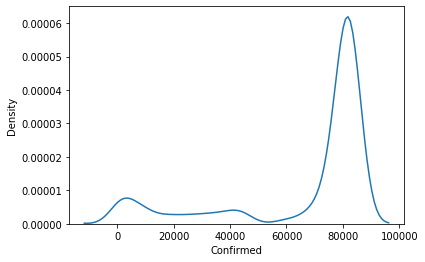

In [35]:
sns.distplot(china['Confirmed'],hist=False, bins=10)
plt.ylabel('Density')
plt.show()

From the plot above, it is evident that the curve is being flattened and that answers the question.

## Recommendations

Using China as a model of success in getting the numbers down, here are some key measures they have put in place in achieving that feat.

1. Strict social distancing measures
2. Avoiding unneccessary travels
3. Wearing face masks when going out and maintain clean hygine at all times.
4. Mandatory lockdowns

Without vaccines for the virus, the above measures have proved to be high detternace for the spread of the virus.